## Students will use a small dataset about student study habits to: 


In [53]:
import pandas as pd 
df = pd.read_csv("C:\Projects\-Predicting-Student-Exam-Results-\student_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   StudentID       30 non-null     object
 1   AttendanceRate  30 non-null     int64 
 2   StudyTime       30 non-null     int64 
 3   FinalExamScore  30 non-null     int64 
 4   Pass/Fail       30 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


## Apply Linear Regression to predict a student’s final exam score based on hours studied. 



In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df[["StudyTime"]]
y = df["FinalExamScore"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
model_lr  = LinearRegression()
model_lr.fit(x_train, y_train)

y_pred_train_lr = model_lr.predict(x_train)
y_pred_test_lr = model_lr.predict(x_test)

print("Training set predictions:", y_pred_train_lr)
print("Test set predictions:", y_pred_test_lr)

Training set predictions: [ 58.99026987  58.99026987  53.77253534  53.77253534  79.861208
  74.64347347  48.55480081  95.5144116   79.861208    53.77253534
  58.99026987  69.42573894  64.20800441  64.20800441  48.55480081
  64.20800441 100.73214614  90.29667707  90.29667707  79.861208
  85.07894254  58.99026987  85.07894254  43.33706628]
Test set predictions: [74.64347347 85.07894254 69.42573894 64.20800441 74.64347347 43.33706628]


## Use Logistic Regression to predict whether a student passes or fails based on attendance rate and study time. 


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x = df[["StudyTime", "AttendanceRate"]] 
y = df["Pass/Fail"]     

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

model_logistic_r = LogisticRegression()

model_logistic_r.fit(x_train, y_train)

y_pred_train_lr = model_logistic_r.predict(x_train)
y_pred_test_lr = model_logistic_r.predict(x_test)

print("Training set predictions:", y_pred_train_lr)
print("Test set predictions:", y_pred_test_lr)

Training set predictions: [0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0]
Test set predictions: [1 1 1 1 1 0]


## Try K-Means Clustering to group students based on their study time and attendance, then describe each group’s characteristics.


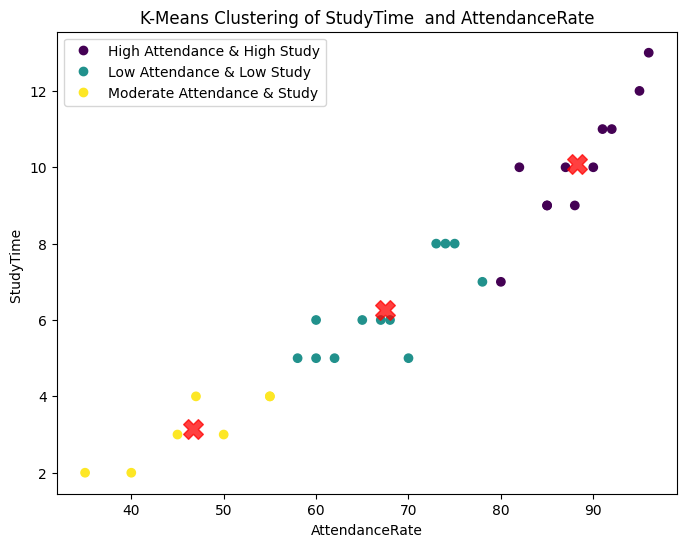


Cluster 0:
       AttendanceRate  StudyTime
count       11.000000  11.000000
mean        88.272727  10.090909
std          5.100802   1.640399
min         80.000000   7.000000
25%         85.000000   9.000000
50%         88.000000  10.000000
75%         91.500000  11.000000
max         96.000000  13.000000

Cluster 1:
       AttendanceRate  StudyTime
count       12.000000  12.000000
mean        67.500000   6.250000
std          6.640099   1.215431
min         58.000000   5.000000
25%         61.500000   5.000000
50%         67.500000   6.000000
75%         73.250000   7.250000
max         78.000000   8.000000

Cluster 2:
       AttendanceRate  StudyTime
count        7.000000   7.000000
mean        46.714286   3.142857
std          7.454625   0.899735
min         35.000000   2.000000
25%         42.500000   2.500000
50%         47.000000   3.000000
75%         52.500000   4.000000
max         55.000000   4.000000


In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 3   # num of clusters

# Adding random state for reproducibility
model_Kmeans = KMeans(n_clusters=k, random_state=42)

columns_for_clustering = ['AttendanceRate', 'StudyTime']

# This line will now work because 'df' exists
df_for_clustering = df[columns_for_clustering]

# Fit the model to the data
model_Kmeans.fit(df_for_clustering)

# --- To see the results, let's visualize them ---

# Get the cluster labels for each data point
labels = model_Kmeans.labels_
# Get the coordinates of the cluster centers
centers = model_Kmeans.cluster_centers_

# Add the cluster labels to our original DataFrame for easy plotting
df['cluster'] = labels

# Plot the data points, coloring them by their assigned cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['AttendanceRate'], df['StudyTime'], c=df['cluster'], cmap='viridis', marker='o')

# Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('K-Means Clustering of StudyTime  and AttendanceRate')
plt.xlabel('AttendanceRate')
plt.ylabel('StudyTime ')
plt.legend(handles=scatter.legend_elements()[0], labels=['High Attendance & High Study', 'Low Attendance & Low Study', 'Moderate Attendance & Study'])
plt.show()

# Describe each cluster's characteristics
for i in range(k):
    group = df[df['cluster'] == i]
    print(f"\nCluster {i}:")
    print(group[columns_for_clustering].describe())
